In [18]:
pip install pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd

# Load the dataset
file_path = "new_house_data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  434 non-null    int64  
 1   id          434 non-null    int64  
 2   Location    434 non-null    object 
 3   lat-lon     434 non-null    float64
 4   Area        434 non-null    object 
 5   Bed         434 non-null    int64  
 6   Bath        434 non-null    int64  
 7   Price       434 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 27.2+ KB
None
   Unnamed: 0  id                         Location   lat-lon        Area  Bed  \
0           0   0  Block H, Bashundhara R-A, Dhaka  0.263433  1,600 sqft    3   
1           1   1         Farmgate, Tejgaon, Dhaka  0.262859    900 sqft    2   
2           3   3        Gulshan 1, Gulshan, Dhaka  0.263010  2,200 sqft    3   
3           4   4                 Baridhara, Dhaka  0.263252  2,200 sqft    3   
4           5

In [20]:
# Convert "Area" to numeric
data["Area"] = data["Area"].str.replace(" sqft", "").str.replace(",", "").astype(float)

# Convert "Price" to numeric, handling "Thousand" and "Lakh"
def convert_price(price_str):
    if "Thousand" in price_str:
        return float(price_str.replace(" Thousand", "").replace(",", "")) * 1_000
    elif "Lakh" in price_str:
        return float(price_str.replace(" Lakh", "").replace(",", "")) * 100_000
    else:
        return None  # Handle unexpected cases

data["Price"] = data["Price"].apply(convert_price)

# Verify changes
print(data[["Area", "Price"]].head())


     Area    Price
0  1600.0  23000.0
1   900.0  23000.0
2  2200.0  78000.0
3  2200.0  77000.0
4  3000.0  52000.0


In [21]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[["lat-lon", "Area", "Bed", "Bath"]]
y = data["Price"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train the SVM regressor
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 3298430795.2404075


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create price categories
data["Price_Category"] = pd.qcut(data["Price"], q=3, labels=["Low", "Medium", "High"])
y = data["Price_Category"]

# Update splitting and training for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7931034482758621


In [24]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
import joblib

# Save the trained model
joblib.dump(svm_model, "svm_model.pkl")

# Load the model later
loaded_model = joblib.load("svm_model.pkl")


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.95      0.78      0.86        27
         Low       0.85      0.82      0.84        34
      Medium       0.62      0.77      0.69        26

    accuracy                           0.79        87
   macro avg       0.81      0.79      0.79        87
weighted avg       0.81      0.79      0.80        87



In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [31]:
pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 603.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 578.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 611.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


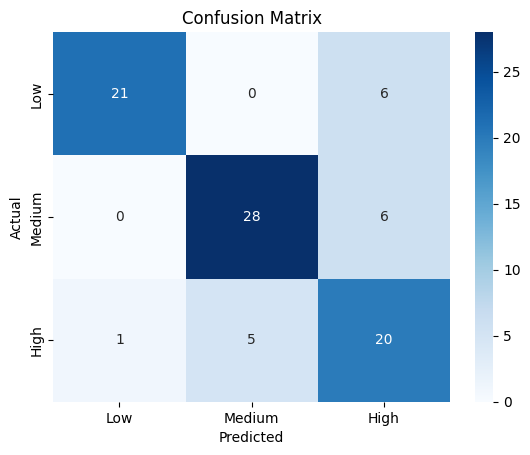

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

